pickle file read
{0: 3497.6184214022724, 2: 1005.9484314018357, 3: 2179.3080276847645, 4: 1432.851969525952, 5: 1367.553472419986, 6: 1164.1403094367258, 7: 951.0419248401894, 8: 672.6265445885933, 9: 538.918362355146, 10: 439.88119112118636, 11: 393.9099536135914, 12: 348.85885025228197, 13: 304.4343452727607, 14: 288.6188731635824, 15: 258.29885927504716, 16: 237.80383949029343, 17: 216.78055438401645, 18: 200.25187946634654, 19: 169.39826484373745, 20: 161.647501270593, 21: 148.8416227465067, 22: 139.94691804044106, 23: 128.26189122743992, 24: 116.62974289128508, 25: 111.95033591359862, 26: 102.82043133274227, 27: 100.98712438970755, 28: 94.91925868455712, 29: 87.92227692324359, 30: 84.55745864016444, 31: 202.4663896846323, 36: 15.554465882342129, 37: 72.67531849551335, 38: 75.97164253047684, 39: 73.03883221157288, 40: 72.95567161219809, 41: 75.36193368684675, 42: 71.27027207999608, 43: 62.96053569354018, 44: 23.43050135129033}
[0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,

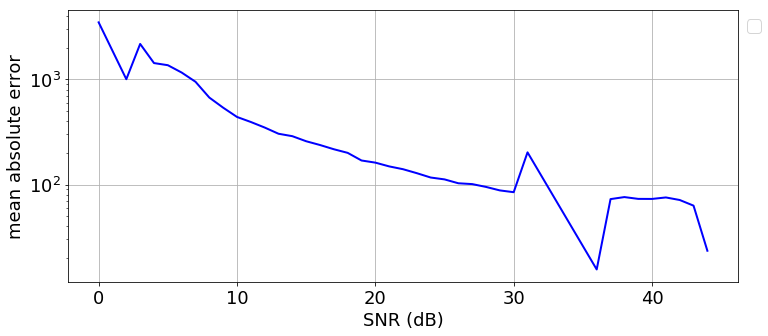

In [3]:
# calculate mean absolute error for CFO estimation per snr
import pickle
import numpy as np
import os

import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots, show
import matplotlib

matplotlib.rcParams.update({'font.size': 18})

# preds_path = '/home/nasim/MachineLearning/results/cfo_arena_snr25_and_larger/preds.pkl'
# preds_path = '/home/nasim/MachineLearning/results/CFOEstimation/cfo-lltf-noiseless-aug/preds.pkl'
# preds_path = '/home/nasim/MachineLearning/results/CFOEstimation-Arena/cfo-from-synched-lltf-compensated/preds.pkl'
# preds_path = '/home/nasim/MachineLearning/results/CFOEstimation-Oracle/cfo-compensated/preds.pkl'
# preds_path = '/home/nasim/MachineLearning/results/CFOEstimation-Oracle/cfo-imposed-50percent-no-aug/preds.pkl'
# preds_path = '/home/nasim/MachineLearning/results/CFOEstimation-Oracle/cfo-imposed-80percent-no-aug/preds.pkl'

preds_path = '/home/nasim/PRONTOFramework/results/CFO-Oracle-39k/preds-oracle.pkl'
# preds_path = '/home/nasim/PRONTOFramework/results/CFO-Oracle-39k/preds-phasenoise.pkl'



max_cfo = 39000
distance_to_snr_dict = {'2ft':39, '8ft':26, '14ft': 22, '20ft':24, '26ft':20, '32ft':17,
                       '38ft':13, '44ft':14, '50ft':15, '56ft':9, '62ft':7}

with open (preds_path,'rb') as handle:
    preds_file = pickle.load(handle)


labels = preds_file['true_labels']
preds_file = preds_file['results']
    

# with open (os.path.join(dataset_path,'stats.pkl'),'rb') as handle:
#     stats = pickle.load(handle)

print 'pickle file read'


# creating the mean absolute error 
mae = {}
total_mae = 0
mae_cntr = 0

for key in preds_file:
    noise_pow = float(key.split('/')[-1].split('.ma')[0].split('_')[-1])
    sig_pow = float(key.split('/')[-1].split('.ma')[0].split('_')[-2])
    if sig_pow == 0 or noise_pow == 0:
        print(key)
        print('saw zero')
    else:
        this_SNR = int(10*np.log10(sig_pow/noise_pow))


#     this_SNR = key.split('/')[-1].split('_')[2]
#     this_SNR = distance_to_snr_dict[this_SNR]
    
    
    if not mae.has_key(this_SNR) and this_SNR <= 100:
        mae[this_SNR] = []
    true_cfo = np.array(labels[key])*max_cfo
#     true_cfo_from_path = float(key.split('/')[-1].split('_')[-1].strip('.mat'))
    
    predicted_cfo = np.array(preds_file[key])*max_cfo


#     if any(true_cfo == 0):
    if true_cfo ==0:

        print key
        print 'saw zero'
    elif this_SNR <= 100:#39:
#         for trues,predicted in zip(true_cfo,predicted_cfo):
            
#             if abs(trues)*39000 < 5000 :
#                 mae[SNR].append(np.absolute(trues-predicted)*39000) 
            
        this_mae = np.mean(np.absolute(true_cfo-predicted_cfo))
        # this_mae = np.absolute(true_cfo-predicted_cfo)/np.absolute(true_cfo)*100
        
        total_mae += this_mae
        mae_cntr += 1
        
        mae[this_SNR].append(this_mae)   


#     print SNR
#     print true_cfo
#     print predicted_cfo
#     print '-------------------------------------------------'



for SNR in mae:
    this_list = mae[SNR]
    if this_list:
        mae[SNR] = sum(this_list)/len(this_list)
        

print mae


fig, ax = subplots(figsize=(12,5))
i=0
lists = sorted(mae.items(),reverse=True) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuple
ax.plot(x ,y , linewidth=2, color='blue')
i += 1
# ax.set_title('Accuracy vs. SNR')
# ax.set_xlabel('distance (ft)')
ax.set_xlabel('SNR (dB)')
# ax.set_ylabel('percentage of error')
ax.set_ylabel('mean absolute error')
ax.set_yscale('log')
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
ax.grid()

snrs = mae.keys()
snrs.sort()
print snrs



cntr = 0
this_mod = 0
for SNR in snrs:
    this_mod += mae[SNR]
    cntr += 1
    print('('+str(SNR)+','+str(mae[SNR])+')')
mae = this_mod/cntr
    
print 'average over all SNRs'
print mae

print 'average over all examples'
print(total_mae/mae_cntr)


  0%|          | 49/663591 [00:00<22:47, 485.11it/s]

pickle file read


100%|██████████| 663591/663591 [22:45<00:00, 485.92it/s]


{0: 3310.7784360573532, 2: 890.2465811461143, 3: 2290.2598318421383, 4: 1479.5489894593898, 5: 1389.0719365683228, 6: 1177.382285752326, 7: 1007.6809788852809, 8: 717.7836522683824, 9: 593.6671378308862, 10: 509.21983913528277, 11: 453.8805503713428, 12: 431.78705973646095, 13: 389.03970661322296, 14: 376.8513793580066, 15: 354.84415039472606, 16: 337.89451506743785, 17: 326.74682966828914, 18: 318.88455978697647, 19: 296.4365032766964, 20: 292.33513165057826, 21: 287.8242276647783, 22: 279.38866784945805, 23: 275.1804469736598, 24: 266.62659939421366, 25: 268.54576693403624, 26: 262.39110911792386, 27: 257.98098251412796, 28: 268.01183733762554, 29: 239.57535946877, 30: 232.55698213191968, 31: 18.542979554567864, 36: 215.6490392497326, 37: 247.31595137160912, 38: 243.2967910643345, 39: 251.7976505457155, 40: 251.39991071291138, 41: 259.9603142382518, 42: 253.38161825381698, 43: 252.75712392958818, 44: 351.61400301449976}
[0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 

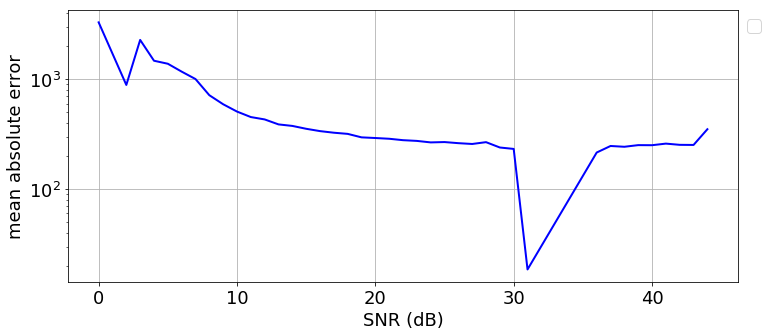

In [2]:
# calculate mean absolute error for phase noise experiment
import pickle
import numpy as np
import os

import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots, show
import matplotlib

from tqdm import tqdm

matplotlib.rcParams.update({'font.size': 18})


preds_path = '/home/nasim/PRONTOFramework/results/CFO-Oracle-39k/preds.pkl'
test_partition_path = '/home/PRONTO/datasets/Oracle-Compensated-LLTF/partition.pkl'


max_cfo = 39000
distance_to_snr_dict = {'2ft':39, '8ft':26, '14ft': 22, '20ft':24, '26ft':20, '32ft':17,
                       '38ft':13, '44ft':14, '50ft':15, '56ft':9, '62ft':7}

with open (test_partition_path,'rb') as handle:
    test_partition = pickle.load(handle)['test']

with open (preds_path,'rb') as handle:
    preds_file = pickle.load(handle)


labels = preds_file['true_labels']
preds_file = preds_file['results']
    

# with open (os.path.join(dataset_path,'stats.pkl'),'rb') as handle:
#     stats = pickle.load(handle)

print 'pickle file read'

test_list_names = list(map(lambda x: x.split('/')[-1], test_partition))

# print(test_list_names)


# creating the mean absolute error 
mae = {}
total_mae = 0
mae_cntr = 0

for key in tqdm(preds_file):
    filename = key.split('/')[-1]
    if filename in test_list_names:
        noise_pow = float(key.split('/')[-1].split('.ma')[0].split('_')[-1])
        sig_pow = float(key.split('/')[-1].split('.ma')[0].split('_')[-2])
        if sig_pow == 0 or noise_pow == 0:
            print(key)
            print('saw zero')
        else:
            this_SNR = int(10*np.log10(sig_pow/noise_pow))


    #     this_SNR = key.split('/')[-1].split('_')[2]
    #     this_SNR = distance_to_snr_dict[this_SNR]


        if not mae.has_key(this_SNR) and this_SNR <= 100:
            mae[this_SNR] = []
        true_cfo = np.array(labels[key])*max_cfo
    #     true_cfo_from_path = float(key.split('/')[-1].split('_')[-1].strip('.mat'))

        predicted_cfo = np.array(preds_file[key])*max_cfo


    #     if any(true_cfo == 0):
        if true_cfo ==0:

            print key
            print 'saw zero'
        elif this_SNR <= 100:#39:
    #         for trues,predicted in zip(true_cfo,predicted_cfo):

    #             if abs(trues)*39000 < 5000 :
    #                 mae[SNR].append(np.absolute(trues-predicted)*39000) 

            this_mae = np.mean(np.absolute(true_cfo-predicted_cfo))
            # this_mae = np.absolute(true_cfo-predicted_cfo)/np.absolute(true_cfo)*100

            total_mae += this_mae
            mae_cntr += 1

            mae[this_SNR].append(this_mae)   


    #     print SNR
    #     print true_cfo
    #     print predicted_cfo
    #     print '-------------------------------------------------'



for SNR in mae:
    this_list = mae[SNR]
    if this_list:
        mae[SNR] = sum(this_list)/len(this_list)
        

print mae


fig, ax = subplots(figsize=(12,5))
i=0
lists = sorted(mae.items(),reverse=True) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuple
ax.plot(x ,y , linewidth=2, color='blue')
i += 1
# ax.set_title('Accuracy vs. SNR')
# ax.set_xlabel('distance (ft)')
ax.set_xlabel('SNR (dB)')
# ax.set_ylabel('percentage of error')
ax.set_ylabel('mean absolute error')
ax.set_yscale('log')
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
ax.grid()

snrs = mae.keys()
snrs.sort()
print snrs



cntr = 0
this_mod = 0
for SNR in snrs:
    this_mod += mae[SNR]
    cntr += 1
    print('('+str(SNR)+','+str(mae[SNR])+')')
mae = this_mod/cntr
    
print 'average over all SNRs'
print mae

print 'average over all examples'
print(total_mae/mae_cntr)


In [12]:
#script to rename the files in partition, label and preds pickle files.
import pickle
import glob
from tqdm import tqdm

partition_pkl_file_path = '/home/PRONTO/datasets/Oracle-Compensated-LLTF/partition.pkl'
new_partition_pkl_file_path = '/home/PRONTO/datasets/Oracle-Compensated-LLTF-2/partition.pkl'
new_folder_path = '/home/nasim/SpinnProject/demodulation_backup/training-set-dummy/'
desired_folder_path = '/home/PRONTO/mat_files/Oracle-Compensated-LLTF/'
new_partition = {}

list_of_lists = ['train','val','test']
for li in list_of_lists:
    with open(partition_pkl_file_path,'rb') as handle:
        content = pickle.load(handle)
    this_list = content[li]

    new_list = []

    for path in tqdm(this_list):
        address = path.split('/run')[0]
        file_name_list = ('run'+path.split('/run')[1]).split('_')
        filename = file_name_list[0]+'_'+file_name_list[1]+'_'+file_name_list[2]+'_'+file_name_list[3]+'_'
        new_path = glob.glob(new_folder_path+filename+'*')
        
        if len(new_path)==1:
            new_file_name = new_path[0].split('/')[-1]
            desired_path = desired_folder_path + new_file_name
            new_list.append(desired_path)
        else:
            print(new_path)
    
    new_partition[li] = new_list

with open (new_partition_pkl_file_path,'wb') as handle:
    pickle.dump(new_partition,handle)

  0%|          | 376/464514 [03:11<63:59:24,  2.01it/s]

KeyboardInterrupt: 

pickle file read
0
23537.581876863947
[23383.629]
-------------------------------------------------
0
-9818.137897089222
[-9891.312]
-------------------------------------------------
0
-17787.346390865256
[-17784.492]
-------------------------------------------------
0
5873.105340468937
[5926.2]
-------------------------------------------------
0
14401.757255453216
[14257.498]
-------------------------------------------------
0
-5820.725970632477
[-5975.7134]
-------------------------------------------------
0
17330.38886681231
[17279.604]
-------------------------------------------------
0
10056.051234745879
[9963.392]
-------------------------------------------------
0
-5212.901596089549
[-5277.8335]
-------------------------------------------------
0
34895.21269484416
[34809.38]
-------------------------------------------------
0
-19541.342963847714
[-19631.85]
-------------------------------------------------
0
24298.303857210238
[24256.74]
-----------------------------------------

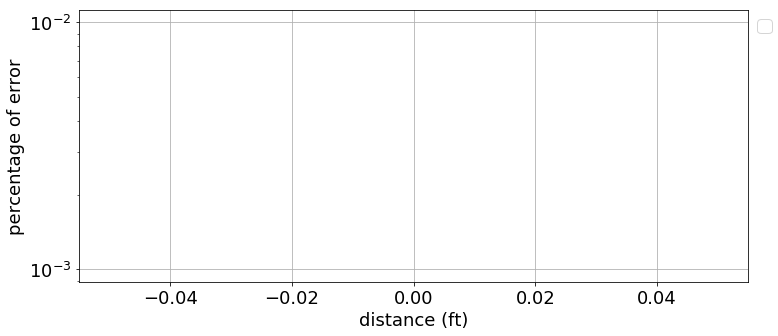

In [4]:
# calculate mean absolute error for CFO estimation per snr for the uav dataset where there is no snr (revision)
import pickle
import numpy as np
import os

import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots, show
import matplotlib

matplotlib.rcParams.update({'font.size': 18})

preds_path = '/home/nasim/PRONTOFramework/results/CFO-Oracle/preds.pkl'


with open (preds_path,'rb') as handle:
    preds_file = pickle.load(handle)


labels = preds_file['true_labels']
preds_file = preds_file['results']
    

# with open (os.path.join(dataset_path,'stats.pkl'),'rb') as handle:
#     stats = pickle.load(handle)

print 'pickle file read'


# creating the mean absolute error 
mae = {}

for key in preds_file:
    SNR = 0
    if not mae.has_key(SNR):
        mae[SNR] = []
    true_cfo = np.array(labels[key])
#     true_cfo_from_path = float(key.split('/')[-1].split('_')[-1].strip('.mat'))
    
    predicted_cfo = np.array(preds_file[key])


#     if any(true_cfo == 0):
    if true_cfo ==0:
#             mae[mod][SNR].append(abs(true_cfo-predicted_cfo)/abs(predicted_cfo))      #/abs(predicted_cfo)
        print key
        print 'saw zero'
    else:
#         for trues,predicted in zip(true_cfo,predicted_cfo):
            
#             if abs(trues)*39000 < 5000 :
#                 mae[SNR].append(np.absolute(trues-predicted)*39000) 
            
#         mae[SNR].append(np.mean(np.absolute(true_cfo-predicted_cfo)*39000))   #/np.absolute(true_cfo)

        mae[SNR].append(np.absolute(true_cfo-predicted_cfo)/np.absolute(true_cfo))

    print SNR
    print true_cfo*39000
    print predicted_cfo*39000
    print '-------------------------------------------------'



for SNR in mae:
    this_list = mae[SNR]
    if this_list:
        mae[SNR] = sum(this_list)/len(this_list)
        

print mae


fig, ax = subplots(figsize=(12,5))
i=0
lists = sorted(mae.items(),reverse=True) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuple
ax.plot(x ,y , linewidth=2, color='blue')
i += 1
# ax.set_title('Accuracy vs. SNR')
ax.set_xlabel('distance (ft)')
ax.set_ylabel('percentage of error')
# ax.set_ylabel('mean absolute error')
ax.set_yscale('log')
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
ax.grid()

snrs = mae.keys()
snrs.sort()
print snrs

cntr = 0
this_mod = 0
for SNR in mae:
    this_mod += mae[SNR]
    cntr += 1
mae = this_mod/cntr
    
print 'average over all SNRs'
print mae
# # ----------------------------------------------------------
# x = np.arange(-2,13)
# # x = np.arange(0,13)
# i = 0
# for mod in classes:
#     print mod
#     y = np.zeros(len(x))
#     y.fill(mae[mod])
#     ax.plot(x,y, linewidth=2, label=mod, linestyle='--', color=color_list[i])
#     i += 1
#     print y[0]

# {14.0021: 0.09181138886234941, 17.3918: 0.08316026046537672, 21.2085: 0.06327570246231226, 34.9478: 0.05935596243350178, 18.9156: 0.056379634644361847, 33.5243: 0.060483786328059896, 32.0355: 0.04010176675094445, 17.49: 0.0465047684169129, 24.8986: 0.040520438206228734, 22.7862: 0.03556016845306888, 14.7101: 0.05873074928835432, 34.9129: 0.05489115330771648, 14.9352: 0.04158962528269116, 16.1456: 0.05148134003186899, 32.0249: 0.040754368709671966, 24.8604: 0.03996318989283414, 28.5029: 0.03924061174169106, 30.1312: 0.04245318825123446, 20.7746: 0.04099810319699184, 35.1187: 0.04821886175837898, 17.7219: 0.045983321459816345, 28.5097: 0.12408057025086798, 30.5526: 0.0326752029930628, 26.6045: 0.050992842839106066, 32.1999: 0.04561903578007833, 33.7027: 0.05838896068413804, 25.0869: 0.0501775405086972, 17.5897: 0.058660613056492436, 14.206: 0.06093703693799699, 16.4748: 0.0545622841166297, 15.9602: 0.0503515277386492, 20.697: 0.04043325325667963, 14.5079: 0.05221260200235102, 15.7931: 0.04954451366506601, 14.6146: 0.04494005687662629, 26.6695: 0.03612325350145026, 28.7355: 0.04440108377569492, 15.1518: 0.06790937299291047, 19.0585: 0.04941362824505359, 33.6837: 0.05069061511762267, 26.5996: 0.04263695142438252, 19.0683: 0.03727761225861698, 14.9123: 0.03692284044336654, 14.317: 0.1665579161390587, 14.5808: 0.07525973077863851, 23.0415: 0.04343695787092571, 30.2325: 0.034925681068734865, 22.3645: 0.04661678206861355}


## comparison with matlab if lltf is fed to the cfo estimator. distances are in order.


72
72
----------------------------------
150
150
----------------------------------
127
127
----------------------------------
154
153
----------------------------------
77
76
----------------------------------
150
150
----------------------------------
43
43
----------------------------------
61
61
----------------------------------
52
52
----------------------------------
61
61
----------------------------------
140
140
----------------------------------
73
72
----------------------------------
128
127
----------------------------------
72
72
----------------------------------
20
19
----------------------------------
38
37
----------------------------------
32
31
----------------------------------
48
49
----------------------------------
122
122
----------------------------------
27
27
----------------------------------
119
118
----------------------------------
59
59
----------------------------------
3
2
----------------------------------
142
142
----------------------------------


----------------------------------
63
62
----------------------------------
95
94
----------------------------------
112
112
----------------------------------
44
43
----------------------------------
114
114
----------------------------------
146
145
----------------------------------
120
119
----------------------------------
54
54
----------------------------------
30
30
----------------------------------
25
25
----------------------------------
83
83
----------------------------------
113
113
----------------------------------
85
84
----------------------------------
135
134
----------------------------------
10
10
----------------------------------
23
23
----------------------------------
156
156
----------------------------------
115
114
----------------------------------
133
132
----------------------------------
81
80
----------------------------------
115
114
----------------------------------
129
129
----------------------------------
87
87
----------------------------------


----------------------------------
71
70
----------------------------------
122
122
----------------------------------
95
94
----------------------------------
127
127
----------------------------------
30
30
----------------------------------
82
82
----------------------------------
97
97
----------------------------------
92
91
----------------------------------
0
0
----------------------------------
117
117
----------------------------------
66
66
----------------------------------
147
147
----------------------------------
67
66
----------------------------------
34
33
----------------------------------
133
132
----------------------------------
14
14
----------------------------------
121
121
----------------------------------
68
68
----------------------------------
4
4
----------------------------------
31
31
----------------------------------
76
76
----------------------------------
104
103
----------------------------------
89
88
----------------------------------
132
132
----

101
----------------------------------
155
155
----------------------------------
149
149
----------------------------------
141
140
----------------------------------
93
93
----------------------------------
120
119
----------------------------------
146
145
----------------------------------
8
8
----------------------------------
93
93
----------------------------------
57
57
----------------------------------
12
12
----------------------------------
157
158
----------------------------------
53
53
----------------------------------
85
84
----------------------------------
77
76
----------------------------------
15
15
----------------------------------
129
129
----------------------------------
124
125
----------------------------------
107
107
----------------------------------
101
101
----------------------------------
2
2
----------------------------------
150
151
----------------------------------
129
127
----------------------------------
14
14
---------------------------------

86
----------------------------------
30
30
----------------------------------
152
151
----------------------------------
3
3
----------------------------------
156
154
----------------------------------
67
67
----------------------------------
108
107
----------------------------------
41
41
----------------------------------
83
82
----------------------------------
30
30
----------------------------------
76
76
----------------------------------
23
23
----------------------------------
112
111
----------------------------------
30
30
----------------------------------
6
6
----------------------------------
86
85
----------------------------------
76
76
----------------------------------
20
19
----------------------------------
70
70
----------------------------------
43
43
----------------------------------
143
142
----------------------------------
60
59
----------------------------------
144
144
----------------------------------
34
33
----------------------------------
42
41
-----

117
----------------------------------
65
64
----------------------------------
124
123
----------------------------------
111
111
----------------------------------
101
101
----------------------------------
41
41
----------------------------------
2
0
----------------------------------
130
130
----------------------------------
159
159
----------------------------------
72
72
----------------------------------
112
111
----------------------------------
71
70
----------------------------------
134
134
----------------------------------
154
153
----------------------------------
1
1
----------------------------------
77
76
----------------------------------
50
49
----------------------------------
19
19
----------------------------------
4
4
----------------------------------
155
154
----------------------------------
138
138
----------------------------------
80
79
----------------------------------
119
118
----------------------------------
76
76
----------------------------------
12

----------------------------------
99
98
----------------------------------
41
41
----------------------------------
36
35
----------------------------------
130
130
----------------------------------
158
158
----------------------------------
138
138
----------------------------------
149
148
----------------------------------
104
104
----------------------------------
39
39
----------------------------------
53
52
----------------------------------
9
8
----------------------------------
70
68
----------------------------------
133
132
----------------------------------
8
8
----------------------------------
79
79
----------------------------------
118
117
----------------------------------
63
62
----------------------------------
17
16
----------------------------------
119
118
----------------------------------
44
45
----------------------------------
69
68
----------------------------------
129
129
----------------------------------
52
52
----------------------------------
87
87
--

29
----------------------------------
135
134
----------------------------------
115
114
----------------------------------
113
113
----------------------------------
40
40
----------------------------------
157
157
----------------------------------
66
65
----------------------------------
155
153
----------------------------------
18
17
----------------------------------
128
127
----------------------------------
155
153
----------------------------------
34
33
----------------------------------
124
123
----------------------------------
101
100
----------------------------------
144
144
----------------------------------
144
144
----------------------------------
125
125
----------------------------------
86
85
----------------------------------
11
10
----------------------------------
11
10
----------------------------------
63
62
----------------------------------
97
96
----------------------------------
75
76
----------------------------------
30
29
------------------------------

----------------------------------
63
62
----------------------------------
134
134
----------------------------------
143
142
----------------------------------
125
125
----------------------------------
9
8
----------------------------------
51
50
----------------------------------
76
76
----------------------------------
132
132
----------------------------------
105
105
----------------------------------
28
27
----------------------------------
55
55
----------------------------------
26
25
----------------------------------
101
101
----------------------------------
46
45
----------------------------------
5
4
----------------------------------
147
147
----------------------------------
18
17
----------------------------------
35
35
----------------------------------
70
70
----------------------------------
22
21
----------------------------------
77
76
----------------------------------
18
18
----------------------------------
39
39
----------------------------------
90
90
------

94
----------------------------------
75
74
----------------------------------
48
47
----------------------------------
121
120
----------------------------------
6
6
----------------------------------
96
96
----------------------------------
140
139
----------------------------------
65
64
----------------------------------
123
122
----------------------------------
0
0
----------------------------------
64
63
----------------------------------
34
33
----------------------------------
28
27
----------------------------------
12
12
----------------------------------
106
107
----------------------------------
10
10
----------------------------------
148
147
----------------------------------
124
123
----------------------------------
118
117
----------------------------------
50
49
----------------------------------
67
67
----------------------------------
61
61
----------------------------------
5
6
----------------------------------
1
0
----------------------------------
134
134
-----

103
----------------------------------
92
91
----------------------------------
77
76
----------------------------------
63
62
----------------------------------
86
85
----------------------------------
105
104
----------------------------------
8
7
----------------------------------
97
96
----------------------------------
103
103
----------------------------------
159
159
----------------------------------
52
52
----------------------------------
32
32
----------------------------------
122
122
----------------------------------
143
142
----------------------------------
13
13
----------------------------------
46
46
----------------------------------
86
85
----------------------------------
90
90
----------------------------------
32
31
----------------------------------
132
132
----------------------------------
101
101
----------------------------------
134
134
----------------------------------
15
14
----------------------------------
30
30
----------------------------------
70
7

104
----------------------------------
80
80
----------------------------------
95
94
----------------------------------
74
74
----------------------------------
101
101
----------------------------------
145
145
----------------------------------
6
6
----------------------------------
122
122
----------------------------------
26
25
----------------------------------
150
149
----------------------------------
159
159
----------------------------------
136
136
----------------------------------
3
2
----------------------------------
123
122
----------------------------------
5
4
----------------------------------
146
145
----------------------------------
92
91
----------------------------------
127
127
----------------------------------
44
43
----------------------------------
94
94
----------------------------------
81
80
----------------------------------
40
41
----------------------------------
11
10
----------------------------------
36
35
----------------------------------
156
15

----------------------------------
40
40
----------------------------------
138
137
----------------------------------
157
155
----------------------------------
117
116
----------------------------------
48
48
----------------------------------
149
149
----------------------------------
116
116
----------------------------------
71
70
----------------------------------
38
37
----------------------------------
66
66
----------------------------------
109
109
----------------------------------
146
145
----------------------------------
83
82
----------------------------------
37
37
----------------------------------
109
109
----------------------------------
44
43
----------------------------------
133
132
----------------------------------
111
111
----------------------------------
97
96
----------------------------------
74
74
----------------------------------
139
139
----------------------------------
86
87
----------------------------------
87
87
----------------------------------


----------------------------------
2
1
----------------------------------
37
37
----------------------------------
147
147
----------------------------------
38
37
----------------------------------
70
70
----------------------------------
120
119
----------------------------------
52
52
----------------------------------
125
125
----------------------------------
119
119
----------------------------------
159
159
----------------------------------
133
132
----------------------------------
0
0
----------------------------------
129
129
----------------------------------
64
64
----------------------------------
14
13
----------------------------------
41
41
----------------------------------
13
12
----------------------------------
62
61
----------------------------------
74
74
----------------------------------
91
90
----------------------------------
139
139
----------------------------------
54
53
----------------------------------
96
96
----------------------------------
45
44
----

----------------------------------
60
61
----------------------------------
75
76
----------------------------------
90
90
----------------------------------
72
72
----------------------------------
45
44
----------------------------------
38
37
----------------------------------
75
76
----------------------------------
45
45
----------------------------------
24
23
----------------------------------
136
136
----------------------------------
46
46
----------------------------------
128
127
----------------------------------
76
76
----------------------------------
159
159
----------------------------------
81
80
----------------------------------
140
139
----------------------------------
6
6
----------------------------------
90
90
----------------------------------
82
82
----------------------------------
133
132
----------------------------------
125
125
----------------------------------
149
149
----------------------------------
107
107
----------------------------------
100
100


103
102
----------------------------------
124
125
----------------------------------
48
48
----------------------------------
129
129
----------------------------------
49
49
----------------------------------
155
154
----------------------------------
96
95
----------------------------------
16
16
----------------------------------
40
40
----------------------------------
52
51
----------------------------------
42
41
----------------------------------
122
122
----------------------------------
111
111
----------------------------------
98
98
----------------------------------
89
87
----------------------------------
149
149
----------------------------------
33
33
----------------------------------
94
93
----------------------------------
12
12
----------------------------------
69
68
----------------------------------
105
104
----------------------------------
39
39
----------------------------------
77
76
----------------------------------
91
91
----------------------------------


43
43
----------------------------------
60
59
----------------------------------
30
30
----------------------------------
6
6
----------------------------------
154
153
----------------------------------
123
122
----------------------------------
73
72
----------------------------------
150
151
----------------------------------
61
61
----------------------------------
118
117
----------------------------------
21
21
----------------------------------
49
49
----------------------------------
153
153
----------------------------------
78
77
----------------------------------
35
35
----------------------------------
144
144
----------------------------------
86
86
----------------------------------
83
82
----------------------------------
106
105
----------------------------------
106
104
----------------------------------
89
88
----------------------------------
21
21
----------------------------------
58
57
----------------------------------
135
134
----------------------------------


41
41
----------------------------------
113
113
----------------------------------
76
76
----------------------------------
55
55
----------------------------------
138
138
----------------------------------
88
87
----------------------------------
138
137
----------------------------------
98
98
----------------------------------
81
80
----------------------------------
31
31
----------------------------------
0
0
----------------------------------
114
114
----------------------------------
102
101
----------------------------------
11
10
----------------------------------
40
39
----------------------------------
53
52
----------------------------------
146
145
----------------------------------
125
125
----------------------------------
11
10
----------------------------------
89
90
----------------------------------
2
1
----------------------------------
137
136
----------------------------------
102
101
----------------------------------
7
6
----------------------------------
87
8

114
114
----------------------------------
54
53
----------------------------------
116
116
----------------------------------
76
76
----------------------------------
113
113
----------------------------------
101
101
----------------------------------
16
16
----------------------------------
129
129
----------------------------------
68
68
----------------------------------
1
0
----------------------------------
156
157
----------------------------------
77
76
----------------------------------
115
114
----------------------------------
75
74
----------------------------------
99
98
----------------------------------
53
53
----------------------------------
12
12
----------------------------------
15
15
----------------------------------
73
72
----------------------------------
8
8
----------------------------------
11
10
----------------------------------
141
141
----------------------------------
50
49
----------------------------------
24
23
----------------------------------
120


69
68
----------------------------------
68
68
----------------------------------
34
33
----------------------------------
132
132
----------------------------------
111
111
----------------------------------
132
132
----------------------------------
62
61
----------------------------------
14
13
----------------------------------
137
136
----------------------------------
151
151
----------------------------------
67
68
----------------------------------
81
80
----------------------------------
31
31
----------------------------------
138
138
----------------------------------
21
19
----------------------------------
18
18
----------------------------------
109
109
----------------------------------
152
151
----------------------------------
109
109
----------------------------------
52
52
----------------------------------
105
104
----------------------------------
47
47
----------------------------------
9
8
----------------------------------
21
21
---------------------------------

----------------------------------
43
43
----------------------------------
79
79
----------------------------------
79
79
----------------------------------
107
107
----------------------------------
63
62
----------------------------------
30
30
----------------------------------
122
122
----------------------------------
74
74
----------------------------------
149
149
----------------------------------
135
134
----------------------------------
152
151
----------------------------------
30
29
----------------------------------
15
14
----------------------------------
35
35
----------------------------------
44
43
----------------------------------
43
43
----------------------------------
153
153
----------------------------------
83
82
----------------------------------
127
127
----------------------------------
38
37
----------------------------------
76
76
----------------------------------
41
41
----------------------------------
120
119
----------------------------------
93
93


132
132
----------------------------------
6
6
----------------------------------
111
111
----------------------------------
17
17
----------------------------------
26
27
----------------------------------
144
144
----------------------------------
112
111
----------------------------------
33
33
----------------------------------
65
65
----------------------------------
30
30
----------------------------------
60
59
----------------------------------
29
29
----------------------------------
107
107
----------------------------------
154
152
----------------------------------
25
25
----------------------------------
61
61
----------------------------------
77
76
----------------------------------
150
150
----------------------------------
75
74
----------------------------------
50
49
----------------------------------
49
49
----------------------------------
87
87
----------------------------------
87
87
----------------------------------
8
7
----------------------------------
68
68


5
4
----------------------------------
21
21
----------------------------------
35
35
----------------------------------
124
125
----------------------------------
39
39
----------------------------------
31
31
----------------------------------
94
93
----------------------------------
64
64
----------------------------------
30
30
----------------------------------
137
136
----------------------------------
159
159
----------------------------------
103
101
----------------------------------
137
136
----------------------------------
110
109
----------------------------------
26
25
----------------------------------
6
6
----------------------------------
151
151
----------------------------------
99
98
----------------------------------
96
96
----------------------------------
13
13
----------------------------------
83
83
----------------------------------
79
79
----------------------------------
79
79
----------------------------------
80
79
----------------------------------
95
94


23
----------------------------------
61
61
----------------------------------
135
134
----------------------------------
83
83
----------------------------------
0
0
----------------------------------
47
47
----------------------------------
63
62
----------------------------------
140
139
----------------------------------
112
111
----------------------------------
104
104
----------------------------------
103
103
----------------------------------
114
114
----------------------------------
133
132
----------------------------------
124
123
----------------------------------
120
119
----------------------------------
10
10
----------------------------------
76
76
----------------------------------
49
49
----------------------------------
136
134
----------------------------------
145
144
----------------------------------
9
9
----------------------------------
66
65
----------------------------------
52
52
----------------------------------
152
151
----------------------------------

140
----------------------------------
124
123
----------------------------------
45
45
----------------------------------
30
30
----------------------------------
15
14
----------------------------------
33
33
----------------------------------
103
103
----------------------------------
93
93
----------------------------------
73
72
----------------------------------
12
12
----------------------------------
10
10
----------------------------------
81
80
----------------------------------
44
43
----------------------------------
22
23
----------------------------------
9
8
----------------------------------
47
46
----------------------------------
44
43
----------------------------------
31
31
----------------------------------
25
25
----------------------------------
43
43
----------------------------------
0
0
----------------------------------
11
10
----------------------------------
126
125
----------------------------------
44
43
----------------------------------
27
27
----------

----------------------------------
46
45
----------------------------------
38
37
----------------------------------
59
59
----------------------------------
152
151
----------------------------------
68
68
----------------------------------
16
15
----------------------------------
11
10
----------------------------------
32
31
----------------------------------
97
96
----------------------------------
154
153
----------------------------------
127
127
----------------------------------
124
123
----------------------------------
39
39
----------------------------------
156
154
----------------------------------
138
137
----------------------------------
2
1
----------------------------------
53
52
----------------------------------
1
0
----------------------------------
77
76
----------------------------------
42
41
----------------------------------
125
125
----------------------------------
140
140
----------------------------------
151
151
----------------------------------
110
110


97
96
----------------------------------
54
53
----------------------------------
110
110
----------------------------------
127
127
----------------------------------
81
80
----------------------------------
18
18
----------------------------------
111
111
----------------------------------
146
145
----------------------------------
73
72
----------------------------------
32
31
----------------------------------
139
139
----------------------------------
62
61
----------------------------------
77
76
----------------------------------
56
54
----------------------------------
47
46
----------------------------------
73
72
----------------------------------
155
154
----------------------------------
9
8
----------------------------------
140
139
----------------------------------
57
56
----------------------------------
53
52
----------------------------------
9
8
----------------------------------
36
36
----------------------------------
2
1
----------------------------------
159
159


----------------------------------
113
113
----------------------------------
36
35
----------------------------------
89
88
----------------------------------
73
72
----------------------------------
76
76
----------------------------------
132
132
----------------------------------
98
98
----------------------------------
50
49
----------------------------------
73
72
----------------------------------
94
94
----------------------------------
28
27
----------------------------------
149
149
----------------------------------
102
101
----------------------------------
120
119
----------------------------------
87
87
----------------------------------
156
156
----------------------------------
57
56
----------------------------------
31
31
----------------------------------
104
104
----------------------------------
96
96
----------------------------------
9
9
----------------------------------
42
41
----------------------------------
125
125
----------------------------------
80
80
--

37
37
----------------------------------
56
56
----------------------------------
80
79
----------------------------------
129
127
----------------------------------
92
91
----------------------------------
17
17
----------------------------------
158
155
----------------------------------
24
23
----------------------------------
123
123
----------------------------------
145
144
----------------------------------
126
125
----------------------------------
140
140
----------------------------------
85
84
----------------------------------
119
119
----------------------------------
141
140
----------------------------------
79
79
----------------------------------
19
18
----------------------------------
152
151
----------------------------------
13
12
----------------------------------
75
76
----------------------------------
153
153
----------------------------------
22
23
----------------------------------
36
35
----------------------------------
13
12
-------------------------------

13
13
----------------------------------
59
59
----------------------------------
110
109
----------------------------------
65
64
----------------------------------
152
151
----------------------------------
28
27
----------------------------------
115
114
----------------------------------
78
77
----------------------------------
47
46
----------------------------------
58
57
----------------------------------
156
156
----------------------------------
152
152
----------------------------------
87
87
----------------------------------
146
145
----------------------------------
155
154
----------------------------------
37
37
----------------------------------
103
103
----------------------------------
75
76
----------------------------------
4
4
----------------------------------
128
127
----------------------------------
3
2
----------------------------------
135
134
----------------------------------
9
8
----------------------------------
98
98
----------------------------------
68

96
96
----------------------------------
108
107
----------------------------------
135
134
----------------------------------
98
98
----------------------------------
116
116
----------------------------------
137
136
----------------------------------
128
127
----------------------------------
128
127
----------------------------------
154
154
----------------------------------
120
119
----------------------------------
90
90
----------------------------------
42
41
----------------------------------
71
70
----------------------------------
117
116
----------------------------------
76
76
----------------------------------
17
16
----------------------------------
154
154
----------------------------------
157
157
----------------------------------
123
122
----------------------------------
35
35
----------------------------------
63
62
----------------------------------
82
83
----------------------------------
46
46
----------------------------------
84
84
---------------------------

125
----------------------------------
80
79
----------------------------------
8
8
----------------------------------
5
4
----------------------------------
100
100
----------------------------------
77
76
----------------------------------
45
45
----------------------------------
144
143
----------------------------------
88
87
----------------------------------
27
27
----------------------------------
112
111
----------------------------------
5
4
----------------------------------
55
55
----------------------------------
50
49
----------------------------------
135
134
----------------------------------
75
76
----------------------------------
157
157
----------------------------------
82
82
----------------------------------
112
111
----------------------------------
100
100
----------------------------------
48
47
----------------------------------
98
98
----------------------------------
27
27
----------------------------------
90
90
----------------------------------
53
52
----

----------------------------------
113
112
----------------------------------
98
98
----------------------------------
119
119
----------------------------------
56
55
----------------------------------
105
104
----------------------------------
40
39
----------------------------------
66
66
----------------------------------
94
94
----------------------------------
71
71
----------------------------------
42
41
----------------------------------
88
87
----------------------------------
72
72
----------------------------------
80
80
----------------------------------
21
21
----------------------------------
71
70
----------------------------------
50
49
----------------------------------
107
107
----------------------------------
153
153
----------------------------------
6
6
----------------------------------
22
21
----------------------------------
6
6
----------------------------------
158
159
----------------------------------
154
153
----------------------------------
91
90
------

111
111
----------------------------------
99
98
----------------------------------
113
113
----------------------------------
65
65
----------------------------------
78
77
----------------------------------
141
140
----------------------------------
16
15
----------------------------------
152
152
----------------------------------
74
72
----------------------------------
4
4
----------------------------------
62
61
----------------------------------
70
70
----------------------------------
121
120
----------------------------------
75
76
----------------------------------
109
109
----------------------------------
146
147
----------------------------------
107
107
----------------------------------
72
72
----------------------------------
153
153
----------------------------------
121
121
----------------------------------
64
63
----------------------------------
156
156
----------------------------------
150
151
----------------------------------
31
31
-----------------------------

25
----------------------------------
33
33
----------------------------------
106
105
----------------------------------
110
110
----------------------------------
84
83
----------------------------------
130
130
----------------------------------
27
27
----------------------------------
129
129
----------------------------------
35
35
----------------------------------
77
76
----------------------------------
113
113
----------------------------------
95
94
----------------------------------
98
98
----------------------------------
151
151
----------------------------------
27
27
----------------------------------
146
146
----------------------------------
98
98
----------------------------------
134
134
----------------------------------
25
24
----------------------------------
37
37
----------------------------------
98
98
----------------------------------
132
132
----------------------------------
158
156
----------------------------------
1
0
----------------------------------
6

----------------------------------
99
98
----------------------------------
97
96
----------------------------------
89
88
----------------------------------
49
49
----------------------------------
82
82
----------------------------------
50
49
----------------------------------
100
100
----------------------------------
126
125
----------------------------------
116
116
----------------------------------
7
6
----------------------------------
86
86
----------------------------------
88
87
----------------------------------
147
147
----------------------------------
75
76
----------------------------------
76
76
----------------------------------
112
111
----------------------------------
66
66
----------------------------------
16
16
----------------------------------
27
27
----------------------------------
95
94
----------------------------------
49
49
----------------------------------
3
2
----------------------------------
11
10
----------------------------------
67
68
----------

58
57
----------------------------------
144
144
----------------------------------
61
61
----------------------------------
89
89
----------------------------------
123
122
----------------------------------
100
100
----------------------------------
38
38
----------------------------------
120
120
----------------------------------
20
18
----------------------------------
126
125
----------------------------------
15
15
----------------------------------
150
149
----------------------------------
121
121
----------------------------------
128
127
----------------------------------
79
79
----------------------------------
70
68
----------------------------------
24
23
----------------------------------
149
149
----------------------------------
106
105
----------------------------------
63
62
----------------------------------
46
45
----------------------------------
91
90
----------------------------------
88
87
----------------------------------
150
150
-----------------------------

76
----------------------------------
51
49
----------------------------------
61
61
----------------------------------
57
56
----------------------------------
18
17
----------------------------------
152
151
----------------------------------
65
64
----------------------------------
65
64
----------------------------------
7
6
----------------------------------
124
125
----------------------------------
7
6
----------------------------------
60
59
----------------------------------
84
84
----------------------------------
8
8
----------------------------------
72
72
----------------------------------
18
17
----------------------------------
126
125
----------------------------------
73
72
----------------------------------
142
142
----------------------------------
66
65
----------------------------------
38
37
----------------------------------
133
132
----------------------------------
146
145
----------------------------------
19
19
----------------------------------
141
140
-----

80
----------------------------------
37
37
----------------------------------
96
96
----------------------------------
48
48
----------------------------------
144
144
----------------------------------
20
19
----------------------------------
47
47
----------------------------------
136
136
----------------------------------
109
109
----------------------------------
102
101
----------------------------------
29
28
----------------------------------
29
29
----------------------------------
70
70
----------------------------------
30
29
----------------------------------
102
101
----------------------------------
100
100
----------------------------------
143
142
----------------------------------
115
115
----------------------------------
93
93
----------------------------------
145
144
----------------------------------
158
159
----------------------------------
4
4
----------------------------------
10
10
----------------------------------
49
49
----------------------------------
1

----------------------------------
21
21
----------------------------------
105
105
----------------------------------
76
76
----------------------------------
105
104
----------------------------------
124
125
----------------------------------
15
15
----------------------------------
63
62
----------------------------------
111
111
----------------------------------
34
33
----------------------------------
28
27
----------------------------------
137
136
----------------------------------
37
37
----------------------------------
80
80
----------------------------------
33
33
----------------------------------
75
74
----------------------------------
54
53
----------------------------------
144
144
----------------------------------
101
101
----------------------------------
30
29
----------------------------------
77
76
----------------------------------
34
33
----------------------------------
23
23
----------------------------------
127
127
----------------------------------
23
23


65
65
----------------------------------
24
23
----------------------------------
71
70
----------------------------------
15
15
----------------------------------
9
8
----------------------------------
85
84
----------------------------------
5
4
----------------------------------
5
4
----------------------------------
68
68
----------------------------------
21
21
----------------------------------
156
157
----------------------------------
114
114
----------------------------------
141
139
----------------------------------
137
136
----------------------------------
140
140
----------------------------------
86
86
----------------------------------
54
54
----------------------------------
118
117
----------------------------------
137
136
----------------------------------
77
76
----------------------------------
141
140
----------------------------------
39
39
----------------------------------
128
127
----------------------------------
132
132
----------------------------------
4


----------------------------------
92
91
----------------------------------
77
76
----------------------------------
55
55
----------------------------------
154
153
----------------------------------
104
104
----------------------------------
31
31
----------------------------------
18
17
----------------------------------
108
107
----------------------------------
84
83
----------------------------------
145
144
----------------------------------
67
67
----------------------------------
53
52
----------------------------------
17
17
----------------------------------
109
109
----------------------------------
116
116
----------------------------------
101
101
----------------------------------
135
134
----------------------------------
68
68
----------------------------------
20
19
----------------------------------
122
122
----------------------------------
102
101
----------------------------------
5
4
----------------------------------
90
90
----------------------------------
117


159
----------------------------------
96
96
----------------------------------
62
61
----------------------------------
152
152
----------------------------------
127
127
----------------------------------
101
100
----------------------------------
142
142
----------------------------------
59
59
----------------------------------
147
147
----------------------------------
144
144
----------------------------------
104
104
----------------------------------
128
127
----------------------------------
70
70
----------------------------------
128
127
----------------------------------
135
134
----------------------------------
68
68
----------------------------------
135
134
----------------------------------
120
119
----------------------------------
154
154
----------------------------------
74
72
----------------------------------
42
41
----------------------------------
110
109
----------------------------------
2
0
----------------------------------
58
57
---------------------------

102
101
----------------------------------
90
90
----------------------------------
5
4
----------------------------------
155
154
----------------------------------
33
33
----------------------------------
15
14
----------------------------------
11
10
----------------------------------
140
139
----------------------------------
123
123
----------------------------------
35
34
----------------------------------
92
91
----------------------------------
110
109
----------------------------------
29
29
----------------------------------
89
88
----------------------------------
141
141
----------------------------------
123
123
----------------------------------
33
33
----------------------------------
109
109
----------------------------------
9
8
----------------------------------
101
101
----------------------------------
31
31
----------------------------------
37
37
----------------------------------
99
98
----------------------------------
19
19
----------------------------------
12

72
72
----------------------------------
16
15
----------------------------------
35
35
----------------------------------
6
6
----------------------------------
97
96
----------------------------------
84
83
----------------------------------
29
29
----------------------------------
56
56
----------------------------------
132
132
----------------------------------
86
86
----------------------------------
135
134
----------------------------------
63
63
----------------------------------
4
4
----------------------------------
87
87
----------------------------------
32
31
----------------------------------
128
127
----------------------------------
48
48
----------------------------------
116
116
----------------------------------
76
76
----------------------------------
95
94
----------------------------------
38
37
----------------------------------
117
116
----------------------------------
87
87
----------------------------------
74
74
----------------------------------
74
72
----

87
----------------------------------
47
46
----------------------------------
71
70
----------------------------------
20
19
----------------------------------
40
39
----------------------------------
38
37
----------------------------------
27
27
----------------------------------
59
59
----------------------------------
80
80
----------------------------------
95
94
----------------------------------
125
125
----------------------------------
112
111
----------------------------------
149
149
----------------------------------
87
87
----------------------------------
22
21
----------------------------------
145
145
----------------------------------
117
116
----------------------------------
71
70
----------------------------------
77
76
----------------------------------
133
132
----------------------------------
40
39
----------------------------------
87
87
----------------------------------
25
25
----------------------------------
97
96
----------------------------------
147
147

87
----------------------------------
15
15
----------------------------------
39
39
----------------------------------
65
65
----------------------------------
97
96
----------------------------------
24
23
----------------------------------
8
8
----------------------------------
144
144
----------------------------------
128
127
----------------------------------
19
18
----------------------------------
51
51
----------------------------------
87
87
----------------------------------
88
87
----------------------------------
18
18
----------------------------------
120
119
----------------------------------
68
68
----------------------------------
156
153
----------------------------------
90
90
----------------------------------
24
23
----------------------------------
118
117
----------------------------------
68
68
----------------------------------
92
91
----------------------------------
35
35
----------------------------------
105
104
----------------------------------
137
136
-

----------------------------------
148
147
----------------------------------
50
49
----------------------------------
26
25
----------------------------------
25
25
----------------------------------
95
94
----------------------------------
19
19
----------------------------------
70
70
----------------------------------
6
6
----------------------------------
10
10
----------------------------------
15
15
----------------------------------
60
59
----------------------------------
80
80
----------------------------------
21
21
----------------------------------
90
90
----------------------------------
51
51
----------------------------------
40
40
----------------------------------
60
59
----------------------------------
127
127
----------------------------------
130
130
----------------------------------
109
109
----------------------------------
71
70
----------------------------------
41
41
----------------------------------
16
15
----------------------------------
89
88
----------

147
----------------------------------
97
96
----------------------------------
2
1
----------------------------------
57
56
----------------------------------
55
55
----------------------------------
77
76
----------------------------------
1
0
----------------------------------
100
100
----------------------------------
158
158
----------------------------------
45
45
----------------------------------
88
87
----------------------------------
40
39
----------------------------------
103
102
----------------------------------
108
107
----------------------------------
55
55
----------------------------------
15
14
----------------------------------
91
91
----------------------------------
132
132
----------------------------------
29
30
----------------------------------
41
41
----------------------------------
63
63
----------------------------------
110
109
----------------------------------
44
43
----------------------------------
26
25
----------------------------------
42
41
----

----------------------------------
49
49
----------------------------------
78
77
----------------------------------
40
40
----------------------------------
150
151
----------------------------------
89
90
----------------------------------
30
30
----------------------------------
107
107
----------------------------------
151
151
----------------------------------
23
23
----------------------------------
67
68
----------------------------------
82
82
----------------------------------
57
56
----------------------------------
26
25
----------------------------------
14
13
----------------------------------
58
57
----------------------------------
117
116
----------------------------------
128
127
----------------------------------
157
154
----------------------------------
39
37
----------------------------------
80
80
----------------------------------
134
134
----------------------------------
70
70
----------------------------------
66
65
----------------------------------
53
53
--

119
118
----------------------------------
53
52
----------------------------------
40
39
----------------------------------
52
52
----------------------------------
143
142
----------------------------------
46
46
----------------------------------
138
138
----------------------------------
49
49
----------------------------------
72
72
----------------------------------
21
21
----------------------------------
108
107
----------------------------------
141
140
----------------------------------
78
77
----------------------------------
97
96
----------------------------------
82
82
----------------------------------
22
21
----------------------------------
78
77
----------------------------------
50
49
----------------------------------
48
48
----------------------------------
11
10
----------------------------------
130
130
----------------------------------
1
1
----------------------------------
80
80
----------------------------------
28
27
----------------------------------
109
10

----------------------------------
40
39
----------------------------------
24
23
----------------------------------
34
33
----------------------------------
117
116
----------------------------------
11
10
----------------------------------
95
94
----------------------------------
116
116
----------------------------------
29
29
----------------------------------
44
43
----------------------------------
60
59
----------------------------------
54
53
----------------------------------
50
49
----------------------------------
31
31
----------------------------------
157
153
----------------------------------
13
12
----------------------------------
35
35
----------------------------------
33
33
----------------------------------
44
43
----------------------------------
43
43
----------------------------------
124
125
----------------------------------
145
144
----------------------------------
54
54
----------------------------------
58
57
----------------------------------
27
27
------

84
83
----------------------------------
38
37
----------------------------------
31
31
----------------------------------
140
139
----------------------------------
67
68
----------------------------------
10
10
----------------------------------
1
0
----------------------------------
81
80
----------------------------------
84
84
----------------------------------
47
46
----------------------------------
140
139
----------------------------------
59
59
----------------------------------
127
127
----------------------------------
137
136
----------------------------------
128
127
----------------------------------
136
136
----------------------------------
154
154
----------------------------------
54
54
----------------------------------
21
21
----------------------------------
15
14
----------------------------------
5
6
----------------------------------
137
136
----------------------------------
12
12
----------------------------------
86
85
----------------------------------
153


27
27
----------------------------------
98
98
----------------------------------
122
122
----------------------------------
91
91
----------------------------------
65
64
----------------------------------
57
57
----------------------------------
95
94
----------------------------------
149
149
----------------------------------
126
125
----------------------------------
150
149
----------------------------------
89
88
----------------------------------
18
18
----------------------------------
68
68
----------------------------------
82
82
----------------------------------
55
55
----------------------------------
71
70
----------------------------------
62
61
----------------------------------
117
117
----------------------------------
150
149
----------------------------------
40
39
----------------------------------
57
57
----------------------------------
154
153
----------------------------------
83
83
----------------------------------
105
104
----------------------------------


----------------------------------
43
43
----------------------------------
0
0
----------------------------------
74
72
----------------------------------
86
86
----------------------------------
65
64
----------------------------------
46
46
----------------------------------
56
55
----------------------------------
141
140
----------------------------------
48
47
----------------------------------
52
52
----------------------------------
107
107
----------------------------------
157
159
----------------------------------
122
122
----------------------------------
20
19
----------------------------------
56
55
----------------------------------
130
130
----------------------------------
43
43
----------------------------------
69
68
----------------------------------
84
84
----------------------------------
106
105
----------------------------------
121
120
----------------------------------
108
107
----------------------------------
125
125
----------------------------------
44
43


82
----------------------------------
80
80
----------------------------------
97
96
----------------------------------
132
132
----------------------------------
82
82
----------------------------------
159
159
----------------------------------
40
39
----------------------------------
132
132
----------------------------------
64
63
----------------------------------
142
142
----------------------------------
138
138
----------------------------------
84
84
----------------------------------
62
62
----------------------------------
127
127
----------------------------------
57
57
----------------------------------
100
100
----------------------------------
102
101
----------------------------------
94
94
----------------------------------
56
55
----------------------------------
151
151
----------------------------------
86
87
----------------------------------
119
119
----------------------------------
159
159
----------------------------------
136
136
------------------------------

0
----------------------------------
3
2
----------------------------------
43
43
----------------------------------
58
57
----------------------------------
154
153
----------------------------------
53
52
----------------------------------
3
2
----------------------------------
19
19
----------------------------------
15
14
----------------------------------
47
46
----------------------------------
53
52
----------------------------------
141
140
----------------------------------
106
105
----------------------------------
62
61
----------------------------------
65
64
----------------------------------
134
134
----------------------------------
104
104
----------------------------------
42
41
----------------------------------
32
31
----------------------------------
28
27
----------------------------------
107
107
----------------------------------
39
39
----------------------------------
6
6
----------------------------------
77
76
----------------------------------
16
16
--------

92
----------------------------------
127
127
----------------------------------
20
19
----------------------------------
93
93
----------------------------------
126
125
----------------------------------
115
114
----------------------------------
47
46
----------------------------------
23
23
----------------------------------
52
52
----------------------------------
78
77
----------------------------------
32
31
----------------------------------
29
29
----------------------------------
86
86
----------------------------------
157
156
----------------------------------
39
39
----------------------------------
152
151
----------------------------------
30
29
----------------------------------
134
134
----------------------------------
72
72
----------------------------------
132
132
----------------------------------
152
151
----------------------------------
37
37
----------------------------------
137
136
----------------------------------
86
85
----------------------------------
2

118
117
----------------------------------
9
8
----------------------------------
155
155
----------------------------------
118
117
----------------------------------
49
49
----------------------------------
42
41
----------------------------------
102
101
----------------------------------
105
104
----------------------------------
60
59
----------------------------------
22
22
----------------------------------
5
6
----------------------------------
78
77
----------------------------------
90
90
----------------------------------
81
80
----------------------------------
84
83
----------------------------------
76
76
----------------------------------
80
80
----------------------------------
83
83
----------------------------------
152
151
----------------------------------
14
13
----------------------------------
16
16
----------------------------------
31
31
----------------------------------
18
17
----------------------------------
52
52
----------------------------------
51
51
--

105
----------------------------------
113
113
----------------------------------
142
142
----------------------------------
73
72
----------------------------------
63
62
----------------------------------
17
17
----------------------------------
113
113
----------------------------------
145
145
----------------------------------
88
87
----------------------------------
110
109
----------------------------------
93
92
----------------------------------
38
37
----------------------------------
115
114
----------------------------------
33
33
----------------------------------
68
68
----------------------------------
125
125
----------------------------------
93
93
----------------------------------
70
70
----------------------------------
98
98
----------------------------------
31
31
----------------------------------
137
136
----------------------------------
105
104
----------------------------------
114
114
----------------------------------
135
134
-------------------------------

1
----------------------------------
126
125
----------------------------------
82
83
----------------------------------
57
57
----------------------------------
106
105
----------------------------------
122
121
----------------------------------
78
77
----------------------------------
150
150
----------------------------------
59
59
----------------------------------
90
90
----------------------------------
157
157
----------------------------------
139
139
----------------------------------
18
18
----------------------------------
22
21
----------------------------------
54
54
----------------------------------
11
10
----------------------------------
13
12
----------------------------------
90
90
----------------------------------
94
94
----------------------------------
56
56
----------------------------------
67
68
----------------------------------
85
84
----------------------------------
42
41
----------------------------------
159
158
----------------------------------
27
27


----------------------------------
51
50
----------------------------------
134
134
----------------------------------
157
157
----------------------------------
105
104
----------------------------------
36
35
----------------------------------
133
132
----------------------------------
77
76
----------------------------------
145
145
----------------------------------
114
113
----------------------------------
37
37
----------------------------------
76
76
----------------------------------
135
134
----------------------------------
88
87
----------------------------------
94
94
----------------------------------
109
109
----------------------------------
29
29
----------------------------------
22
21
----------------------------------
141
140
----------------------------------
42
41
----------------------------------
140
139
----------------------------------
113
112
----------------------------------
110
109
----------------------------------
148
147
-------------------------------

94
----------------------------------
110
109
----------------------------------
46
45
----------------------------------
38
37
----------------------------------
40
40
----------------------------------
3
3
----------------------------------
132
132
----------------------------------
146
145
----------------------------------
20
19
----------------------------------
72
72
----------------------------------
69
68
----------------------------------
89
88
----------------------------------
67
68
----------------------------------
133
132
----------------------------------
113
113
----------------------------------
3
2
----------------------------------
41
41
----------------------------------
105
104
----------------------------------
16
15
----------------------------------
147
147
----------------------------------
138
138
----------------------------------
64
64
----------------------------------
138
138
----------------------------------
25
25
----------------------------------
72
72

----------------------------------
13
12
----------------------------------
34
33
----------------------------------
17
17
----------------------------------
117
117
----------------------------------
56
55
----------------------------------
39
39
----------------------------------
75
76
----------------------------------
109
107
----------------------------------
130
130
----------------------------------
140
139
----------------------------------
11
10
----------------------------------
17
16
----------------------------------
105
104
----------------------------------
92
91
----------------------------------
120
119
----------------------------------
32
31
----------------------------------
17
17
----------------------------------
83
82
----------------------------------
30
30
----------------------------------
122
122
----------------------------------
28
27
----------------------------------
109
109
----------------------------------
130
130
----------------------------------
33
3

----------------------------------
80
79
----------------------------------
72
72
----------------------------------
59
59
----------------------------------
148
147
----------------------------------
115
115
----------------------------------
142
142
----------------------------------
128
127
----------------------------------
8
8
----------------------------------
26
25
----------------------------------
111
111
----------------------------------
30
29
----------------------------------
138
137
----------------------------------
29
28
----------------------------------
42
41
----------------------------------
17
17
----------------------------------
16
15
----------------------------------
74
74
----------------------------------
122
121
----------------------------------
20
19
----------------------------------
123
123
----------------------------------
127
127
----------------------------------
64
64
----------------------------------
37
37
----------------------------------
96
96


87
87
----------------------------------
148
148
----------------------------------
74
74
----------------------------------
128
127
----------------------------------
73
72
----------------------------------
119
119
----------------------------------
110
109
----------------------------------
34
33
----------------------------------
43
43
----------------------------------
144
144
----------------------------------
29
29
----------------------------------
58
57
----------------------------------
44
43
----------------------------------
126
125
----------------------------------
29
29
----------------------------------
7
6
----------------------------------
143
142
----------------------------------
144
144
----------------------------------
112
111
----------------------------------
98
98
----------------------------------
62
61
----------------------------------
65
65
----------------------------------
77
76
----------------------------------
138
138
---------------------------------

117
----------------------------------
92
91
----------------------------------
73
72
----------------------------------
30
30
----------------------------------
29
29
----------------------------------
74
73
----------------------------------
60
59
----------------------------------
96
96
----------------------------------
56
56
----------------------------------
28
27
----------------------------------
129
129
----------------------------------
72
72
----------------------------------
125
125
----------------------------------
151
151
----------------------------------
100
100
----------------------------------
89
88
----------------------------------
59
59
----------------------------------
55
55
----------------------------------
29
29
----------------------------------
10
10
----------------------------------
109
109
----------------------------------
76
76
----------------------------------
69
68
----------------------------------
152
152
----------------------------------
123
12

47
46
----------------------------------
130
129
----------------------------------
141
140
----------------------------------
70
70
----------------------------------
90
90
----------------------------------
55
55
----------------------------------
127
127
----------------------------------
3
2
----------------------------------
118
118
----------------------------------
28
27
----------------------------------
115
114
----------------------------------
4
3
----------------------------------
40
40
----------------------------------
105
104
----------------------------------
92
91
----------------------------------
27
27
----------------------------------
39
38
----------------------------------
72
72
----------------------------------
85
84
----------------------------------
102
101
----------------------------------
151
151
----------------------------------
18
18
----------------------------------
64
63
----------------------------------
78
77
----------------------------------
145


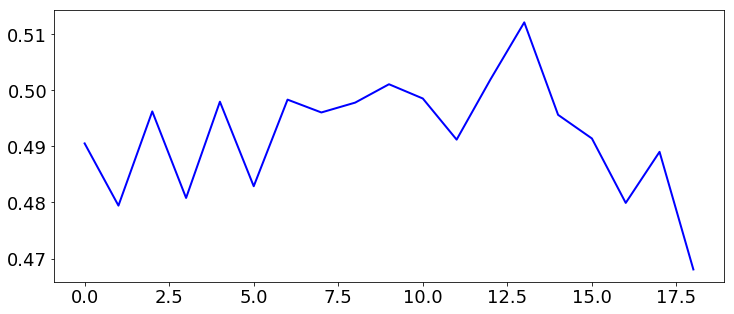

In [46]:
# calculate accuracy per snr for start packet detection as a classification problem
import pickle
import numpy as np
import os

import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots, show
import matplotlib

matplotlib.rcParams.update({'font.size': 18})

preds_path = '/home/nasim/MachineLearning/results/packet-start-from-lltf/preds.pkl'

with open (preds_path,'rb') as handle:
    preds_file = pickle.load(handle)['preds_exp']
    
dataset_path = '/home/Arena/datasets/packet-start-from-lltf/'
with open (os.path.join(dataset_path,'label.pkl'),'rb') as handle:
    labels = pickle.load(handle)

SNR_list = []
for this_file in preds_file:
    SNR = int(float(this_file.split('/')[-1].split('_')[-3]))
    if SNR not in SNR_list:
        SNR_list.append(SNR)
SNR_list.sort()
    
    
correct_ex = np.zeros(len(SNR_list))
total_ex = np.zeros(len(SNR_list))

for this_file in preds_file:
    SNR = int(float(this_file.split('/')[-1].split('_')[-3]))
    true_label = labels[this_file]
    true_index = int(true_label)-2
    predicted_index = np.argmax(preds_file[this_file])
    if true_index == predicted_index:
        correct_ex[SNR_list.index(SNR)] += 1
    print true_index
    print predicted_index
    print '----------------------------------'
    total_ex[SNR_list.index(SNR)] += 1

acc = correct_ex/total_ex

fig, ax = subplots(figsize=(12,5))
x = np.arange(len(SNR_list))
ax.plot(x ,acc , linewidth=2, color='blue')

155.0
156.23695
----------------------------------
6.0
4.622437
----------------------------------
44.0
42.741833
----------------------------------
108.0
107.73496
----------------------------------
46.0
45.115826
----------------------------------
161.0
161.15211
----------------------------------
153.0
152.16025
----------------------------------
59.0
55.58376
----------------------------------
77.0
78.897194
----------------------------------
40.0
38.82866
----------------------------------
41.0
38.543015
----------------------------------
91.0
88.87247
----------------------------------
37.0
34.982132
----------------------------------
65.0
62.03189
----------------------------------
105.0
104.36323
----------------------------------
117.0
115.74531
----------------------------------
18.0
17.100992
----------------------------------
74.0
73.34131
----------------------------------
2.0
2.3878477
----------------------------------
28.0
25.907457
----------------------------------
2.

----------------------------------
26.0
25.824547
----------------------------------
45.0
44.625122
----------------------------------
18.0
16.536407
----------------------------------
14.0
12.995469
----------------------------------
129.0
126.323326
----------------------------------
140.0
139.4926
----------------------------------
126.0
125.1987
----------------------------------
38.0
36.139446
----------------------------------
79.0
76.53602
----------------------------------
154.0
151.87619
----------------------------------
49.0
48.266907
----------------------------------
69.0
67.81428
----------------------------------
41.0
40.141468
----------------------------------
29.0
28.210815
----------------------------------
73.0
72.87612
----------------------------------
148.0
148.12727
----------------------------------
5.0
3.47109
----------------------------------
111.0
109.30485
----------------------------------
152.0
152.27028
----------------------------------
129.0
129.87982

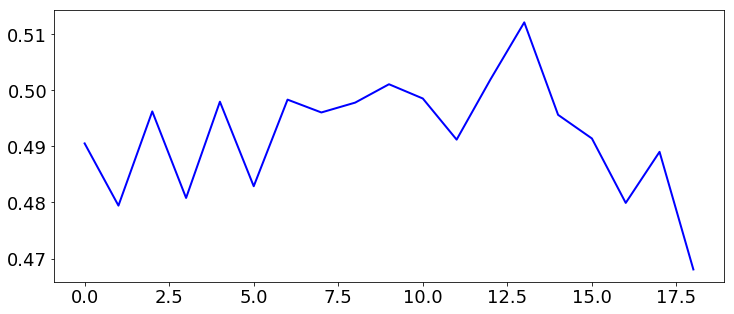

In [48]:
# calculate accuracy per snr for start packet detection as a regression problem
import pickle
import numpy as np
import os

import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots, show
import matplotlib

matplotlib.rcParams.update({'font.size': 18})

preds_path = '/home/nasim/MachineLearning/results/packet-start-from-lltf-regression/preds.pkl'

with open (preds_path,'rb') as handle:
    preds_file = pickle.load(handle)
    
dataset_path = '/home/Arena/datasets/packet-start-from-lltf-regression/'
with open (os.path.join(dataset_path,'label.pkl'),'rb') as handle:
    labels = pickle.load(handle)

SNR_list = []
for this_file in preds_file:
    SNR = int(float(this_file.split('/')[-1].split('_')[-3]))
    if SNR not in SNR_list:
        SNR_list.append(SNR)
SNR_list.sort()
    
    
correct_ex = np.zeros(len(SNR_list))
total_ex = np.zeros(len(SNR_list))

for this_file in preds_file:
    SNR = int(float(this_file.split('/')[-1].split('_')[-3]))
    true_label = labels[this_file]
    predicted_label = preds_file[this_file]
    
    
#     if true_index == predicted_index:
#         correct_ex[SNR_list.index(SNR)] += 1
    print true_label
    print predicted_label
    print '----------------------------------'
#     total_ex[SNR_list.index(SNR)] += 1

# acc = correct_ex/total_ex

fig, ax = subplots(figsize=(12,5))
x = np.arange(len(SNR_list))
ax.plot(x ,acc , linewidth=2, color='blue')

  3%|▎         | 3358/132921 [00:00<00:03, 33570.91it/s]

pickle file read


100%|██████████| 132921/132921 [00:03<00:00, 33496.80it/s]


(2, 6)


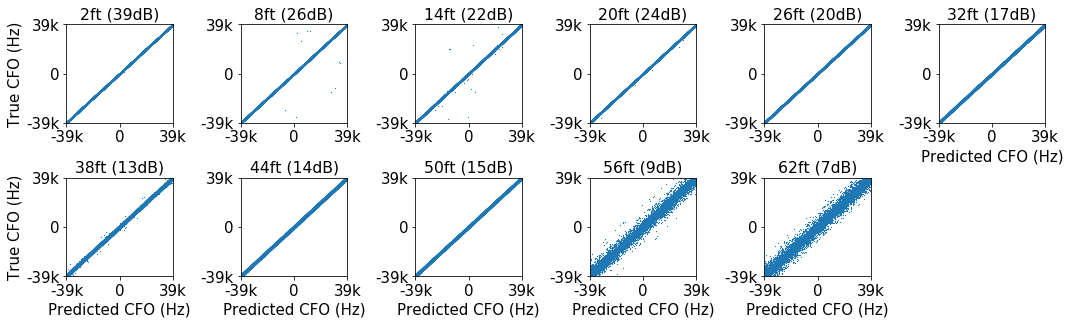

In [2]:
# scatter plot for coarse cfo estimation
import pickle
import numpy as np
import os

import matplotlib.pyplot as plt 
from matplotlib.pyplot import subplots, show
import matplotlib
from tqdm import tqdm

SNR_dict ={'2ft':39.8717, '8ft':26.0466, '14ft':22.9087, '20ft':24.7952, '26ft':20.9097, '32ft':17.2901, '38ft':13.9017, '44ft':14.5118, '50ft':15.6828, '56ft':9.2535, '62ft':7.3290}

preds_path =  '/home/nasim/MachineLearning/results/CFOEstimation-Oracle/cfo-compensated/preds-old.pkl'
# preds_path = '/home/nasim/MachineLearning/results/CFOEstimation-Oracle/cfo-with-labels-risk/preds.pkl'

with open (preds_path,'rb') as handle:
    preds_file = pickle.load(handle)

labels = preds_file['true_labels']
preds_file = preds_file['results']

print 'pickle file read'

# creating the mean absolute error 
from tqdm import tqdm
scatter = {}
x = {}
y = {}
for key in tqdm(preds_file):
    distance = key.split('/')[-1].split('_')[2]
    SNR = SNR_dict[distance]
    
    if not x.has_key(distance):
        x[distance] = []
        y[distance] = []
    
    
    true_cfo = list(map(lambda x: x*39000, labels[key]))
    predicted_cfo = list(map(lambda x: x*39000, preds_file[key]))
#  true label comes on y axis
    
    y[distance] += true_cfo
    x[distance] += predicted_cfo

#     true_cfo = labels[key]
#     predicted_cfo = preds_file[key]
#     y[distance].append(true_cfo*39000)
#     x[distance].append(predicted_cfo*39000)


#     print labels[key]*39000
#     print true_cfo*39000
#     print '---------------------------'

# -------- Now the scatter dict is ready. plot the graphs --------

matplotlib.rcParams.update({'font.size': 13})

fig, axes = subplots(figsize=(15,4.7),nrows=2, ncols=6)
distance_list = ['2ft','8ft','14ft','20ft','26ft','32ft','38ft','44ft','50ft','56ft','62ft']

k = 0
print axes.shape
for i in range(axes.shape[0]):
    for j in range(axes.shape[1]):
        if k<len(distance_list):
            distance = distance_list[k]
            SNR = int(SNR_dict[distance])
            k += 1
            x_list = x[distance]
            y_list = y[distance]

            ax=axes[i,j]
            ax.set_xticks([-39000,0,39000])
            ax.set_xticklabels(['-39k','0','39k'],fontsize=15)
            ax.set_yticks([-39000,0,39000])
            ax.set_yticklabels(['-39k','0','39k'],fontsize=15)
            ax.scatter(x_list,y_list,s=0.5,linewidth=0.5)
            ax.set_xlim([-39000, 39000])
            ax.set_ylim([-39000, 39000])
            ax.set_title(distance+' ('+str(SNR)+'dB)')
            axes[-1,j].set_xlabel('Predicted CFO (Hz)',fontsize=15)
    axes[0,-1].set_xlabel('Predicted CFO (Hz)',fontsize=15)
    axes[i,0].set_ylabel('True CFO (Hz)',fontsize=15)

fig.delaxes(axes[1,-1])
plt.tight_layout()

[2, 8, 14, 20, 26, 32, 38, 44, 50, 56, 62]
{22.9087: '14ft', 7.329: '62ft', 9.2535: '56ft', 20.9097: '26ft', 24.7952: '20ft', 26.0466: '8ft', 39.8717: '2ft', 14.5118: '44ft', 15.6828: '50ft', 17.2901: '32ft', 13.9017: '38ft'}
[7.329, 9.2535, 13.9017, 14.5118, 15.6828, 17.2901, 20.9097, 22.9087, 24.7952, 26.0466, 39.8717]
[7.329, 9.2535, 13.9017, 14.5118, 15.6828, 17.2901, 20.9097, 22.9087, 24.7952, 26.0466, 39.8717]
[0.4226090021029326, 0.1686131032962003, 0.09383403269708158, 0.07225941048154068, 0.07814131038941793, 0.06195601240871047, 0.048441406338725, 0.053295271136567096, 0.1557035668781611, 0.035516955506120725, 0.037844285531302105]
(7.329,0.422609002103)
(9.2535,0.168613103296)
(13.9017,0.0938340326971)
(14.5118,0.0722594104815)
(15.6828,0.0781413103894)
(17.2901,0.0619560124087)
(20.9097,0.0484414063387)
(22.9087,0.0532952711366)
(24.7952,0.155703566878)
(26.0466,0.0355169555061)
(39.8717,0.0378442855313)


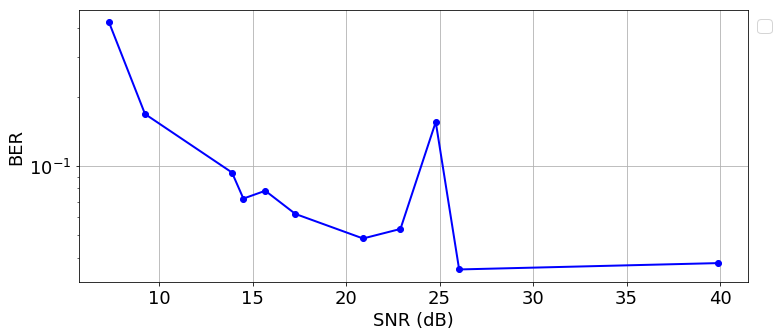

In [2]:
import pickle
import numpy as np
import os

import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots, show
import matplotlib



# loss_dict= {32: 0.08921536704480286, 2: 0.04730527433640622, 38: 0.09486670688749847, 8: 0.039590963267926896, 44: 0.07509803534954584, 14: 0.047934225610719694, 50: 0.10067072250096061, 20: 0.05886541627138689, 56: 0.18377956910553958, 26: 0.05565329148976382, 62: 0.28208648580217405}#9%
# loss_dict = {32: 0.08203966971902792, 2: 0.037920655687090604, 38: 0.1088882523750254, 8: 0.04900871175893155, 44: 0.08356999664811983, 14: 0.04877369381908037, 50: 0.07031917009182956, 20: 0.03346234674040607, 56: 0.19511361497849816, 26: 0.039919706373908924, 62: 0.5137102239110193}
# mean absolute error
# loss_dict = {32: 226.7677731465716, 2: 113.44559153353737, 38: 318.0673094647426, 8: 121.09171536272038, 44: 289.07840010337446, 14: 141.94970752401764, 50: 259.0058262739575, 20: 123.15983900106143, 56: 667.6187520949428, 26: 160.51491194615812, 62: 1099.1404220170693}
# loss_dict = {32: 222.22888352373712, 2: 100.20762508199388, 38: 315.5894948240514, 8: 116.17183028675866, 44: 287.17672870045567, 14: 138.0138289141996, 50: 257.60045258777507, 20: 120.1762160164308, 56: 647.8957695925047, 26: 160.42218552013543, 62: 1001.637633574081}
loss_dict = {32: 25685.49599202734, 2: 23550.74634764124, 38: 25979.17063321658, 8: 25610.84492645736, 44: 25898.22347023237, 14: 25511.923260484033, 50: 26061.910657009066, 20: 25488.232107435542, 56: 26361.431351676576, 26: 25860.865575313408, 62: 25856.970184699236}
loss_dict = {32: 364.36612311854304, 2: 469.0092501228786, 38: 470.4097090288311, 8: 301.55058337841575, 44: 431.85965730642454, 14: 306.0562391334363, 50: 399.2798154285005, 20: 296.562796516025, 56: 1054.2886728106544, 26: 319.1301770574334, 62: 1681.3872759779524}
loss_dict = {32: 0.06195601240871047, 2: 0.037844285531302105, 38: 0.09383403269708158, 8: 0.035516955506120725, 44: 0.07225941048154068, 14: 0.053295271136567096, 50: 0.07814131038941793, 20: 0.1557035668781611, 56: 0.1686131032962003, 26: 0.048441406338725, 62: 0.4226090021029326}


#sorted by distance ascending
# ber_from_matlab = [0.0003492057582, 0.0003636890357, 0.0003879794895, 0.00008735375669, 0.00009268793351, 0.0001393296724, 0.0001354244434, 0.0001339089768, 0.0003393985679, 0.001262075228, 0.006082119835]

distance_dict ={'2ft':39.8717, '8ft':26.0466, '14ft':22.9087, '20ft':24.7952, '26ft':20.9097, '32ft':17.2901, '38ft':13.9017, '44ft':14.5118, '50ft':15.6828, '56ft':9.2535, '62ft':7.3290}


distance_list = distance_dict.keys()
distance_list = list(map(lambda x: int(x.strip('ft')),distance_list))
distance_list.sort()
print distance_list

matplotlib.rcParams.update({'font.size': 18})

SNR_dict = {}
for key, value in distance_dict.items():
    SNR_dict[value] = key
print SNR_dict
    
SNR_list = SNR_dict.keys()
SNR_list.sort()
print SNR_list

# ber_SNR_dict = {}
# for key,ber in zip(distance_list,ber_from_matlab):
#     ber_SNR_dict[distance_dict[str(key)+'ft']] = ber 
# print ber_SNR_dict
    
x = SNR_list
y = list(map(lambda x: loss_dict[float(SNR_dict[x].strip('ft'))],SNR_list))
# y = [8.1665,6.3942,7.9106,10.5522,6.9163,7.0337,8.0681,6.3480,19.2361,6.1577,5.8469]

# x = SNR_list
# y = list(map(lambda x: ber_SNR_dict[x],SNR_list))
print x
print y

for snr , error in zip(x,y):
    print '('+str(snr)+','+str(error)+')'


fig, ax = subplots(figsize=(12,5))

# X should be SNR
ax.plot(x ,y , linewidth=2, color='blue', marker='o')

# ax.set_title('Accuracy vs. SNR')
ax.set_xlabel('SNR (dB)')
ax.set_ylabel('BER')
# ax.set_ylabel('mean absolute error')
ax.set_yscale('log')
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
ax.grid()




['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97']
['true_index', 'preds_slice', 'preds_exp']
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64

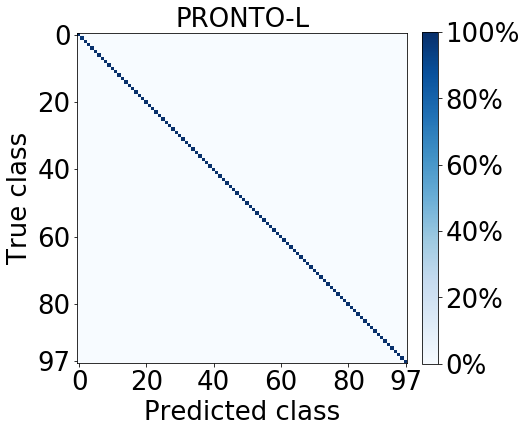

In [3]:
## conf matrix for packet detection

import matplotlib.pyplot as plt
import numpy as np
import pickle

classes = []
this_class = 0
while this_class < 98:
    classes.append(str(this_class))
    this_class += 1
print classes

preds_path = '/home/nasim/MachineLearning/results/CFOEstimation-Oracle/packet-start-deepsig/preds.pkl'


with open (preds_path,'rb') as handle:
    preds_file = pickle.load(handle)
    
print preds_file.keys()


dict_pred = preds_file['preds_exp']
true_labels = preds_file['true_index']

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues, labels=[]):
    fig = plt.figure(figsize=(7,7))
#     fig = plt.figure()
    ax = fig.add_subplot(111)
    im = plt.imshow(cm, interpolation='nearest', cmap=cmap)
    maximum = np.amax(cm)
    
    font_size = 26
    
    plt.title(title,fontsize=font_size)
    bar_label = ['0%','20%','40%','60%','80%','100%']
    cbar = plt.colorbar(im,fraction=0.046, pad=0.04)
    cbar.ax.set_yticklabels(bar_label)
    cbar.ax.tick_params(labelsize=font_size) 
    #plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks([0,20,40,60,80,97], ['0','20','40','60','80','97'], rotation=0, fontsize=font_size)
    plt.yticks([0,20,40,60,80,97], ['0','20','40','60','80','97'], fontsize=font_size)
    plt.tight_layout()
    plt.title('PRONTO-L',fontsize=font_size)
    plt.ylabel('True class',fontsize=font_size)
    plt.xlabel('Predicted class',fontsize=font_size)
    plt.show()

conf = np.zeros([len(classes),len(classes)])
normalized_conf = np.zeros([len(classes),len(classes)])
    
print classes
    
for key in dict_pred:
    true_label = str(true_labels[key])
    true_index = classes.index(true_label)
    predicted_index = np.argmax(dict_pred[key])
    conf[true_index,predicted_index] += 1
        
# now conf is ready
for i in range(len(classes)):
    normalized_conf[i,:] = 1.0*conf[i,:] / np.sum(conf[i,:])

labels = classes

plot_confusion_matrix(normalized_conf, title=" ", labels=labels)

In [67]:
import pickle
import numpy as np

preds_path = '/home/nasim/PRONTOFramework/results/Packet-Oracle-PRONTOS/preds-oracle.pkl'

with open (preds_path,'rb') as handle:
    content = pickle.load(handle)

true_labels = content['true_labels']
results = content['results']

total_ex_cnt, correct_ex_cnt = 0, 0

for ex in true_labels:
    this_true_label = np.argmax(true_labels[ex])
    this_result = np.argmax(results[ex])
    
    if this_true_label == this_result:
        correct_ex_cnt += 1
    else:
        print(ex)
        print(this_true_label, this_result)
    total_ex_cnt += 1

/home/PRONTO/mat_files/Oracle-NotCompensated-LLTF/run2_3123D79_62ft_1258_1640.4766_3.8111e-07_1.0162e-07.mat
(79, 81)
/home/PRONTO/mat_files/Oracle-NotCompensated-LLTF/run2_3123EFE_38ft_1201_183.8082_6.2612e-07_1.0345e-07.mat
(78, 77)
/home/PRONTO/mat_files/Oracle-NotCompensated-LLTF/run1_3123D7E_56ft_1535_560.4978_4.8363e-07_9.5796e-08.mat
(42, 41)
/home/PRONTO/mat_files/Oracle-NotCompensated-LLTF/run1_3123D89_56ft_919_-53.6929_6.028e-07_7.0307e-08.mat
(34, 32)
/home/PRONTO/mat_files/Oracle-NotCompensated-LLTF/run2_3123D89_56ft_1575_2012.6821_5.929e-07_1.0003e-07.mat
(25, 24)
/home/PRONTO/mat_files/Oracle-NotCompensated-LLTF/run1_3123D79_62ft_18_822.9365_3.7684e-07_1.0938e-07.mat
(34, 33)
/home/PRONTO/mat_files/Oracle-NotCompensated-LLTF/run2_3123D58_56ft_39_2345.1119_2.6969e-07_9.8683e-08.mat
(50, 49)
/home/PRONTO/mat_files/Oracle-NotCompensated-LLTF/run1_3123D78_56ft_1592_1822.1038_6.4317e-07_1.0905e-07.mat
(84, 83)
/home/PRONTO/mat_files/Oracle-NotCompensated-LLTF/run1_3123D7B_62ft

/home/PRONTO/mat_files/Oracle-NotCompensated-LLTF/run2_3123D64_62ft_426_6342.1631_3.5597e-07_1.0137e-07.mat
(93, 94)
/home/PRONTO/mat_files/Oracle-NotCompensated-LLTF/run1_3123D58_56ft_638_11627.9819_2.9223e-07_1.0218e-07.mat
(64, 65)
/home/PRONTO/mat_files/Oracle-NotCompensated-LLTF/run1_3123D7E_56ft_707_2277.0639_5.0961e-07_8.965e-08.mat
(69, 70)
/home/PRONTO/mat_files/Oracle-NotCompensated-LLTF/run1_3123D89_56ft_970_8340.3393_5.2691e-07_7.2559e-08.mat
(42, 43)
/home/PRONTO/mat_files/Oracle-NotCompensated-LLTF/run1_3123EFE_50ft_153_954.1281_3.079e-06_1.0151e-07.mat
(13, 12)
/home/PRONTO/mat_files/Oracle-NotCompensated-LLTF/run2_3123D79_62ft_1132_1034.8936_3.9515e-07_9.3336e-08.mat
(47, 57)
/home/PRONTO/mat_files/Oracle-NotCompensated-LLTF/run1_3123D58_26ft_1920_1192.8786_1.2332e-05_8.8285e-08.mat
(3, 4)
/home/PRONTO/mat_files/Oracle-NotCompensated-LLTF/run2_3123D7E_50ft_1200_242.1033_6.017e-06_9.9761e-08.mat
(85, 86)
/home/PRONTO/mat_files/Oracle-NotCompensated-LLTF/run2_3123EFE_38ft

/home/PRONTO/mat_files/Oracle-NotCompensated-LLTF/run1_3123D89_56ft_1145_3804.9012_5.0315e-07_9.1143e-08.mat
(71, 72)
/home/PRONTO/mat_files/Oracle-NotCompensated-LLTF/run1_3123D79_62ft_1439_2286.3066_4.3393e-07_8.6448e-08.mat
(0, 1)
/home/PRONTO/mat_files/Oracle-NotCompensated-LLTF/run1_3123D7E_56ft_353_912.1088_5.1446e-07_7.8703e-08.mat
(27, 26)
/home/PRONTO/mat_files/Oracle-NotCompensated-LLTF/run1_3123D64_62ft_247_1541.625_3.4279e-07_9.868e-08.mat
(4, 3)
/home/PRONTO/mat_files/Oracle-NotCompensated-LLTF/run2_3123D80_56ft_517_979.3838_1.5021e-06_7.4612e-08.mat
(96, 95)
/home/PRONTO/mat_files/Oracle-NotCompensated-LLTF/run2_3123D7E_56ft_949_414.4594_5.9748e-07_7.1219e-08.mat
(25, 24)
/home/PRONTO/mat_files/Oracle-NotCompensated-LLTF/run2_3123D89_56ft_1153_1016.3565_6.6643e-07_7.9924e-08.mat
(5, 4)
/home/PRONTO/mat_files/Oracle-NotCompensated-LLTF/run2_3123D76_8ft_1198_1057.7779_2.3493e-05_1.1537e-07.mat
(63, 62)
/home/PRONTO/mat_files/Oracle-NotCompensated-LLTF/run2_3123D64_56ft_16_1

/home/PRONTO/mat_files/Oracle-NotCompensated-LLTF/run2_3123D7B_56ft_1628_1088.6983_7.2283e-07_9.6009e-08.mat
(59, 60)
/home/PRONTO/mat_files/Oracle-NotCompensated-LLTF/run1_3123D79_62ft_1242_747.79_4.6713e-07_9.0412e-08.mat
(22, 21)
/home/PRONTO/mat_files/Oracle-NotCompensated-LLTF/run1_3123D7E_56ft_831_783.1269_4.9497e-07_1.1459e-07.mat
(45, 44)
/home/PRONTO/mat_files/Oracle-NotCompensated-LLTF/run2_3123D7E_56ft_1884_457.0992_5.3952e-07_8.663e-08.mat
(74, 76)
/home/PRONTO/mat_files/Oracle-NotCompensated-LLTF/run2_3123D52_62ft_874_2826.3219_4.0426e-07_7.5524e-08.mat
(56, 59)
/home/PRONTO/mat_files/Oracle-NotCompensated-LLTF/run1_3123D7D_56ft_56_2555.4354_5.2236e-07_6.7808e-08.mat
(60, 61)
/home/PRONTO/mat_files/Oracle-NotCompensated-LLTF/run1_3123D58_56ft_792_2790.0921_3.6128e-07_8.9169e-08.mat
(43, 45)
/home/PRONTO/mat_files/Oracle-NotCompensated-LLTF/run1_3124E4A_2ft_0_1233.4107_0.0011782_1.0948e-07.mat
(75, 76)
/home/PRONTO/mat_files/Oracle-NotCompensated-LLTF/run1_3123D89_56ft_468_

In [78]:
text_path = '/home/nasim/PRONTOFramework/results/Packet-Oracle-Fine/log.out'
word = 'loss:'
epoch_cntr = 1

with open(text_path) as f:
    lines = f.readlines()
    for line in lines:
        line_list = line.split(' ')
        if word in line_list:
            this_value = line_list[line_list.index(word)+1]
            print('('+str(epoch_cntr)+','+str(this_value)+')')
            epoch_cntr += 1

(1,2.8421)
(2,1.8944)
(3,1.2277)
(4,0.7331)
(5,0.4172)
(6,0.2598)
(7,0.1778)
(8,0.1260)
(9,0.1027)
(10,0.0826)
(11,0.0695)
(12,0.0598)
(13,0.0531)
(14,0.0468)
(15,0.0427)
(16,0.0358)
(17,0.0348)
(18,0.0309)
(19,0.0283)
(20,0.0262)
(21,0.0239)
(22,0.0232)
(23,0.0222)
(24,0.0205)
(25,0.0185)
(26,0.0185)
(27,0.0173)
(28,0.0157)
(29,0.0149)
(30,0.0139)
(31,0.0124)
(32,0.0126)
(33,0.0110)
(34,0.0118)
(35,0.0105)
(36,0.0110)
(37,0.0097)
(38,0.0088)
(39,0.0087)
(40,0.0091)
(41,0.0086)
(42,0.0082)
(43,0.0083)
(44,0.0082)
(45,0.0081)
(46,0.0068)
(47,0.0065)
(48,0.0055)
(49,0.0062)
(50,0.0069)
(51,0.0061)
(52,0.0059)
(53,0.0048)
(54,0.0060)
(55,0.0060)
(56,0.0066)
(57,0.0050)
(58,0.0054)
(59,0.0051)
(60,0.0040)
(61,0.0048)
(62,0.0039)
(63,0.0051)
(64,0.0037)
(65,0.0035)
(66,0.0050)
(67,0.0050)
(68,0.0035)
(69,0.0048)
(70,0.0039)
(71,0.0040)
(72,0.0038)
(73,0.0045)
(74,0.0044)
(75,0.0050)
(76,0.0032)
(77,0.0037)
(78,0.0033)
(79,0.0035)
(80,0.0034)
(81,0.0036)
(82,0.0033)
(83,0.0044)
(84,0.0043)
(

In [82]:
import numpy as np

print(np.log10(10))

1.0
